# 决策树的学习曲线

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

/Users/yanchao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

# 学习曲线
# 基于RMSE绘制学习曲线

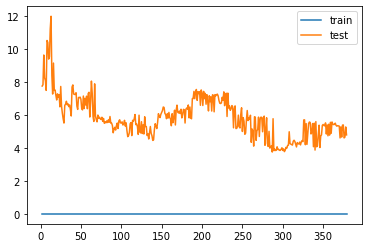

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(2, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))

    plt.plot([i for i in range(2, len(X_train)+1)],
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(2, len(X_train)+1)],
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.show()

plot_learning_curve(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

# 基于R^2值绘制学习曲线

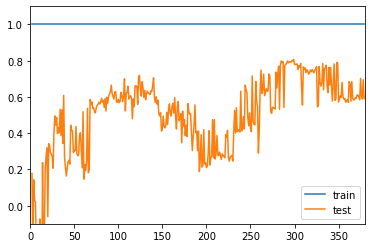

In [9]:
from sklearn.metrics import r2_score

def plot_learning_curve_r2(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(2, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(r2_score(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(r2_score(y_test, y_test_predict))

    plt.plot([i for i in range(2, len(X_train)+1)],
                               train_score, label="train")
    plt.plot([i for i in range(2, len(X_train)+1)],
                               test_score, label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, -0.1, 1.1])
    plt.show()

plot_learning_curve_r2(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

In [10]:
# 以max_depth参数为例，看不同参数学习曲线的不同

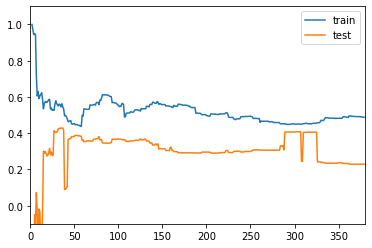

In [11]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=1), X_train, X_test, y_train, y_test)

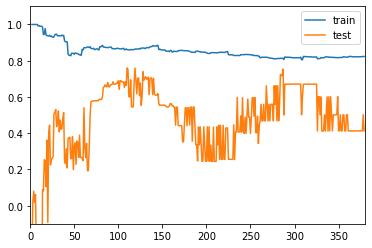

In [12]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=3), X_train, X_test, y_train, y_test)

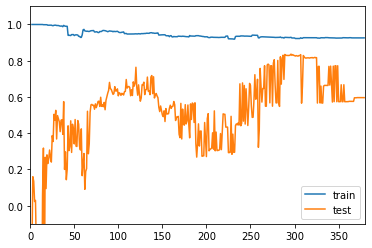

In [13]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=5), X_train, X_test, y_train, y_test)

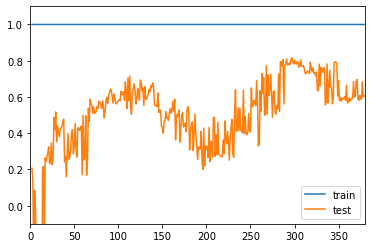

In [14]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=20), X_train, X_test, y_train, y_test)